# Optimizing Hyperparameters

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
file = '/Users/luciamf/Desktop/Landmarks_generator/eval.tsv'
eval_df = pd.read_csv(file, sep='\t')
eval_df = eval_df[["cpu","Training_size", "Testing_size", "Tree_depth", "cascade_depth", "nu", "feature_pool_size", "num_test_splits", "oversampling_amount", "training_time", "training_error", "testing_error", "model_size"]]
eval_df.head()

,cpu,Training_size,Testing_size,Tree_depth,cascade_depth,nu,feature_pool_size,num_test_splits,oversampling_amount,training_time,training_error,testing_error,model_size
0,10,133,90,6.0,13.0,0.100500,600.0,160.0,60.0,114.014556,0.048701,70.853119,59468.379883
1,10,133,90,4.0,9.0,0.152767,425.0,144.0,31.0,29.858040,1.287202,68.865950,11052.957031
2,10,133,90,6.0,13.0,0.120853,828.0,282.0,75.0,202.682027,0.019063,70.779079,59831.679688
3,10,133,90,5.0,8.0,0.136370,420.0,186.0,40.0,48.431167,0.741454,71.460952,19250.789062
4,10,133,90,4.0,14.0,0.158000,604.0,278.0,54.0,96.736369,0.761353,53.170623,17257.408203


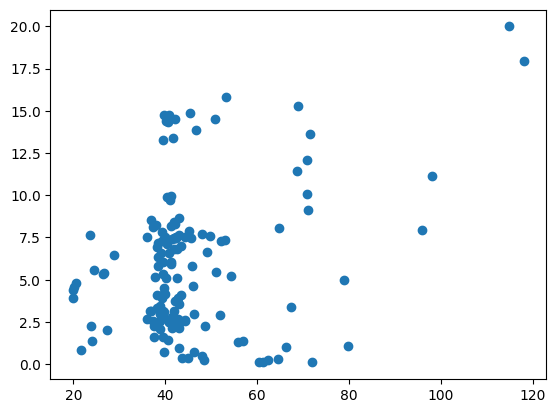

In [4]:
plt.scatter(eval_df['testing_error'].values, (eval_df['nu'].values)*100)


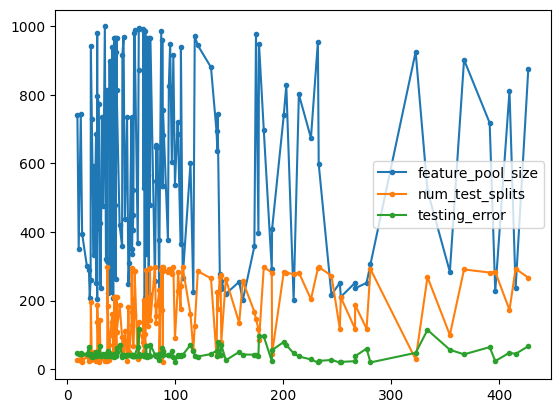

In [5]:
df_time = eval_df.sort_values(by='training_time')
plt.plot(df_time['training_time'].values, (df_time['feature_pool_size'].values), marker='.', label='feature_pool_size')
plt.plot(df_time['training_time'].values, (df_time['num_test_splits'].values), marker='.',label='num_test_splits')
plt.plot(df_time['training_time'].values, (df_time['testing_error'].values), marker='.', label='testing_error')
plt.legend()

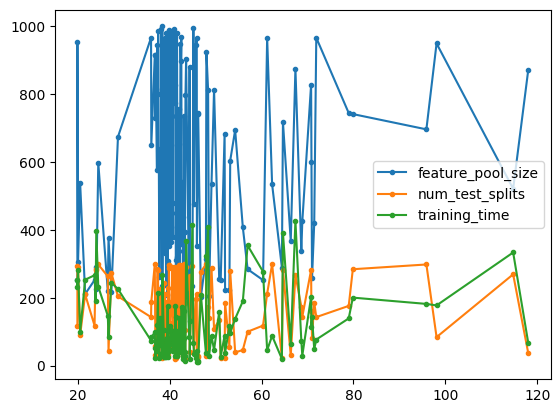

In [6]:
df_error = eval_df.sort_values(by='testing_error')
plt.plot(df_error['testing_error'].values, (df_error['feature_pool_size'].values), marker='.', label='feature_pool_size')
plt.plot(df_error['testing_error'].values, (df_error['num_test_splits'].values), marker='.',label='num_test_splits')
plt.plot(df_error['testing_error'].values, (df_error['training_time'].values), marker='.', label='training_time')
plt.legend()

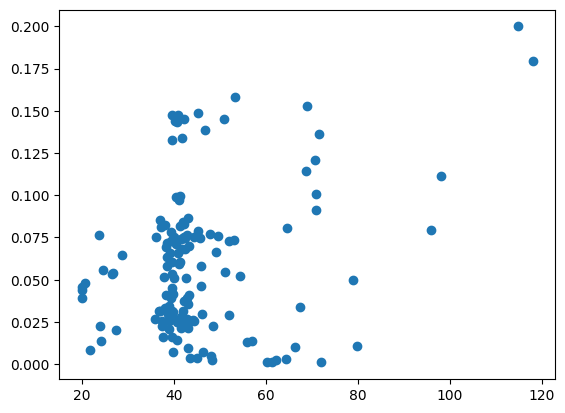

In [7]:
plt.scatter(eval_df['testing_error'].values, eval_df['nu'].values)


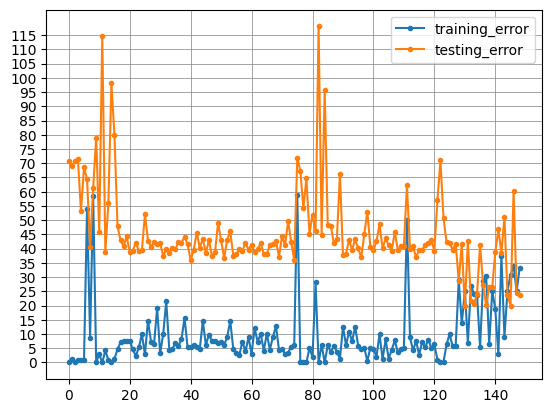

In [8]:
plt.plot(eval_df['training_error'], label='training_error', marker='.')
plt.plot(eval_df['testing_error'], label='testing_error', marker='.')
# plt.plot(eval_df['model_size']/1024, label='model_size')
# plt.plot(eval_df['training_time'], label='training_time')
plt.legend()
plt.yticks(np.arange(0,120,5))
plt.grid(color='gray', linewidth=0.5,)


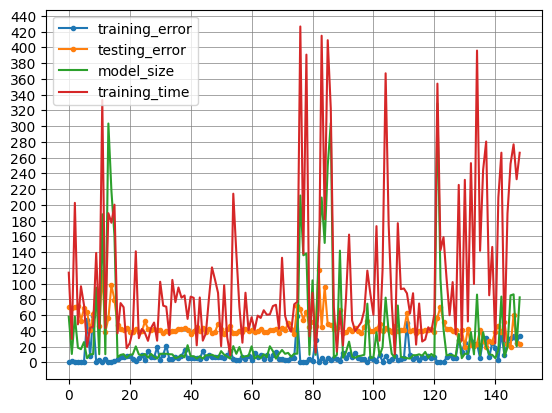

In [9]:
plt.plot(eval_df['training_error'], label='training_error', marker='.')
plt.plot(eval_df['testing_error'], label='testing_error', marker='.')
plt.plot(eval_df['model_size']/1024, label='model_size')
plt.plot(eval_df['training_time'], label='training_time')
plt.legend()
plt.yticks(np.arange(0,450,20))
plt.grid(color='gray', linewidth=0.5,)


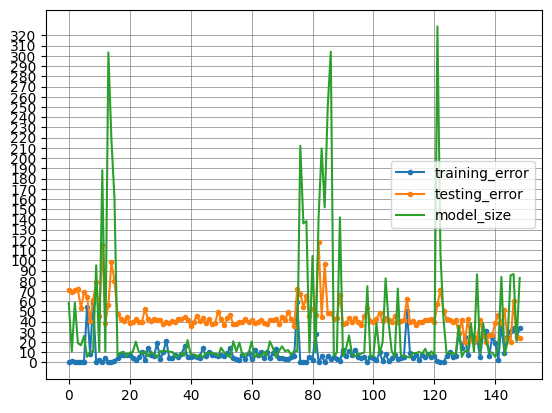

In [10]:
plt.plot(eval_df['training_error'], label='training_error', marker='.')
plt.plot(eval_df['testing_error'], label='testing_error', marker='.')
plt.plot(eval_df['model_size']/1024, label='model_size')
# plt.plot(eval_df['training_time'], label='training_time')
plt.legend()
plt.yticks(np.arange(0,330,10))
plt.grid(color='gray', linewidth=0.5,)

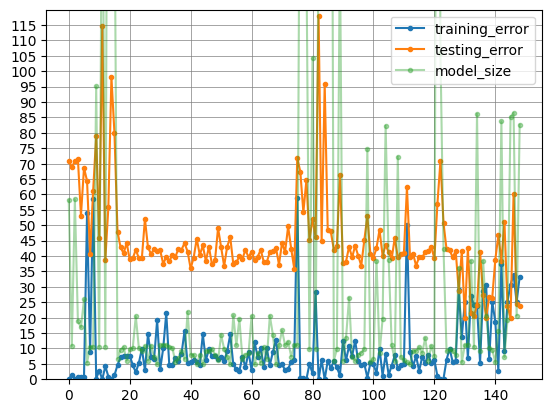

In [11]:
plt.plot(eval_df['training_error'], label='training_error', marker='.')
plt.plot(eval_df['testing_error'], label='testing_error', marker='.')
plt.plot(eval_df['model_size']/1024, label='model_size', alpha=0.4, marker='.')
# plt.plot(eval_df['training_time'], label='training_time')
plt.legend()
plt.ylim(0,120)
plt.yticks(np.arange(0,120,5))
plt.grid(color='gray', linewidth=0.5,)

In [12]:
count=0
for i in eval_df['testing_error'].values:
    if i > 60:
        count+=1
print(count)

20


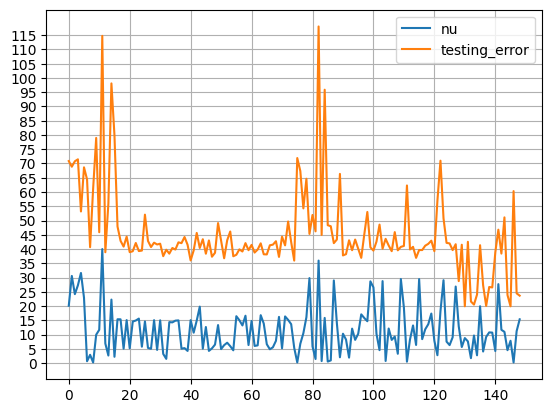

In [36]:
# plt.plot(eval_df['Tree_depth'], label='Tree_depth')
plt.plot(eval_df['nu']*200, label='nu')
plt.plot(eval_df['testing_error'], label='testing_error')
# plt.plot(eval_df['cascade_depth'], label='cascade_depth')
# plt.plot(eval_df['feature_pool_size']/100, label='feature_pool_size')
# plt.plot(eval_df['num_test_splits']/100, label='num_test_splits')
# plt.plot(eval_df['oversampling_amount']/10, label='oversampling_amount')
plt.yticks(np.arange(0,120,5))
plt.grid()
plt.legend()

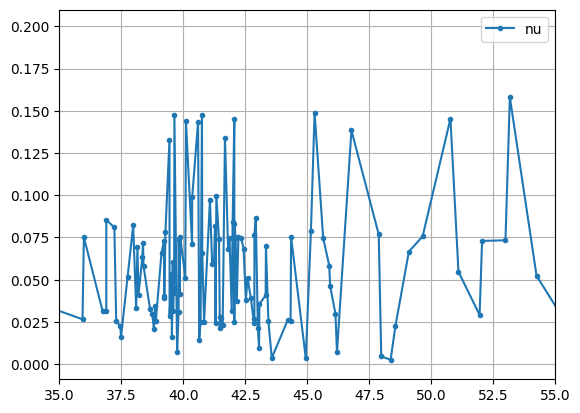

In [63]:
df_error = eval_df.sort_values(by='testing_error')
plt.plot(df_error['testing_error'].values, (df_error['nu'].values), marker='.', label='nu')

plt.legend()

# plt.plot(eval_df['cascade_depth'], label='cascade_depth')
# plt.plot(eval_df['feature_pool_size']/100, label='feature_pool_size')
# plt.plot(eval_df['num_test_splits']/100, label='num_test_splits')
# plt.plot(eval_df['oversampling_amount']/10, label='oversampling_amount')
plt.xlim(35,55)
plt.grid()
plt.legend()

[]

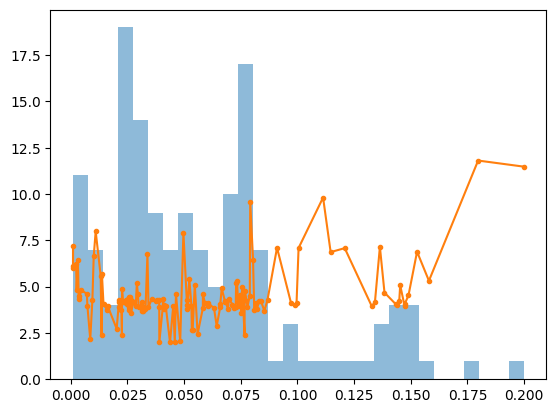

In [74]:
df_error = eval_df.sort_values(by='nu')
plt.plot(df_error['nu'].values, (df_error['testing_error'].values)/10, marker='.', label='testing_error')
plt.hist(list(eval_df['nu'].values), bins=30, alpha=0.5)
plt.plot()

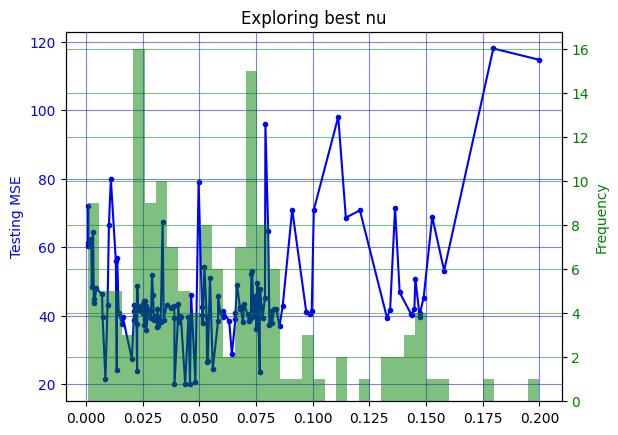

In [89]:
fig, ax1 = plt.subplots()
ax1.plot(df_error['nu'].values, (df_error['testing_error'].values), color='b', marker='.', label='testing_error')
ax1.set_label('Nu')
ax1.set_ylabel('Testing MSE', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, color='b', alpha=0.5)

ax2=ax1.twinx()
ax2.hist(list(eval_df['nu'].values), bins=40, alpha=0.5, color='g')
ax2.set_ylabel('Frequency', color='g')
ax2.tick_params(axis='y', labelcolor='g')

ax2.grid(True, color='g', alpha=0.5)
plt.title("Exploring best nu")
plt.show()

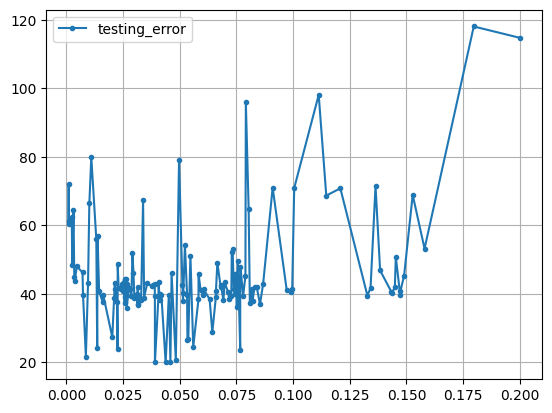

In [54]:
df_error = eval_df.sort_values(by='nu')
plt.plot(df_error['nu'].values, (df_error['testing_error'].values), marker='.', label='testing_error')

plt.legend()

# plt.plot(eval_df['cascade_depth'], label='cascade_depth')
# plt.plot(eval_df['feature_pool_size']/100, label='feature_pool_size')
# plt.plot(eval_df['num_test_splits']/100, label='num_test_splits')
# plt.plot(eval_df['oversampling_amount']/10, label='oversampling_amount')
plt.grid()
plt.legend()

In [55]:
eval_df.head()

,cpu,Training_size,Testing_size,Tree_depth,cascade_depth,nu,feature_pool_size,num_test_splits,oversampling_amount,training_time,training_error,testing_error,model_size
0,10,133,90,6.0,13.0,0.100500,600.0,160.0,60.0,114.014556,0.048701,70.853119,59468.379883
1,10,133,90,4.0,9.0,0.152767,425.0,144.0,31.0,29.858040,1.287202,68.865950,11052.957031
2,10,133,90,6.0,13.0,0.120853,828.0,282.0,75.0,202.682027,0.019063,70.779079,59831.679688
3,10,133,90,5.0,8.0,0.136370,420.0,186.0,40.0,48.431167,0.741454,71.460952,19250.789062
4,10,133,90,4.0,14.0,0.158000,604.0,278.0,54.0,96.736369,0.761353,53.170623,17257.408203


In [56]:
exclude_cols = ['cpu', 'Training_size', 'Testing_size']
small_df = eval_df[[col for col in eval_df.columns if col not in exclude_cols]]

boxplot_cols = ['cascade_depth', 'Tree_depth']


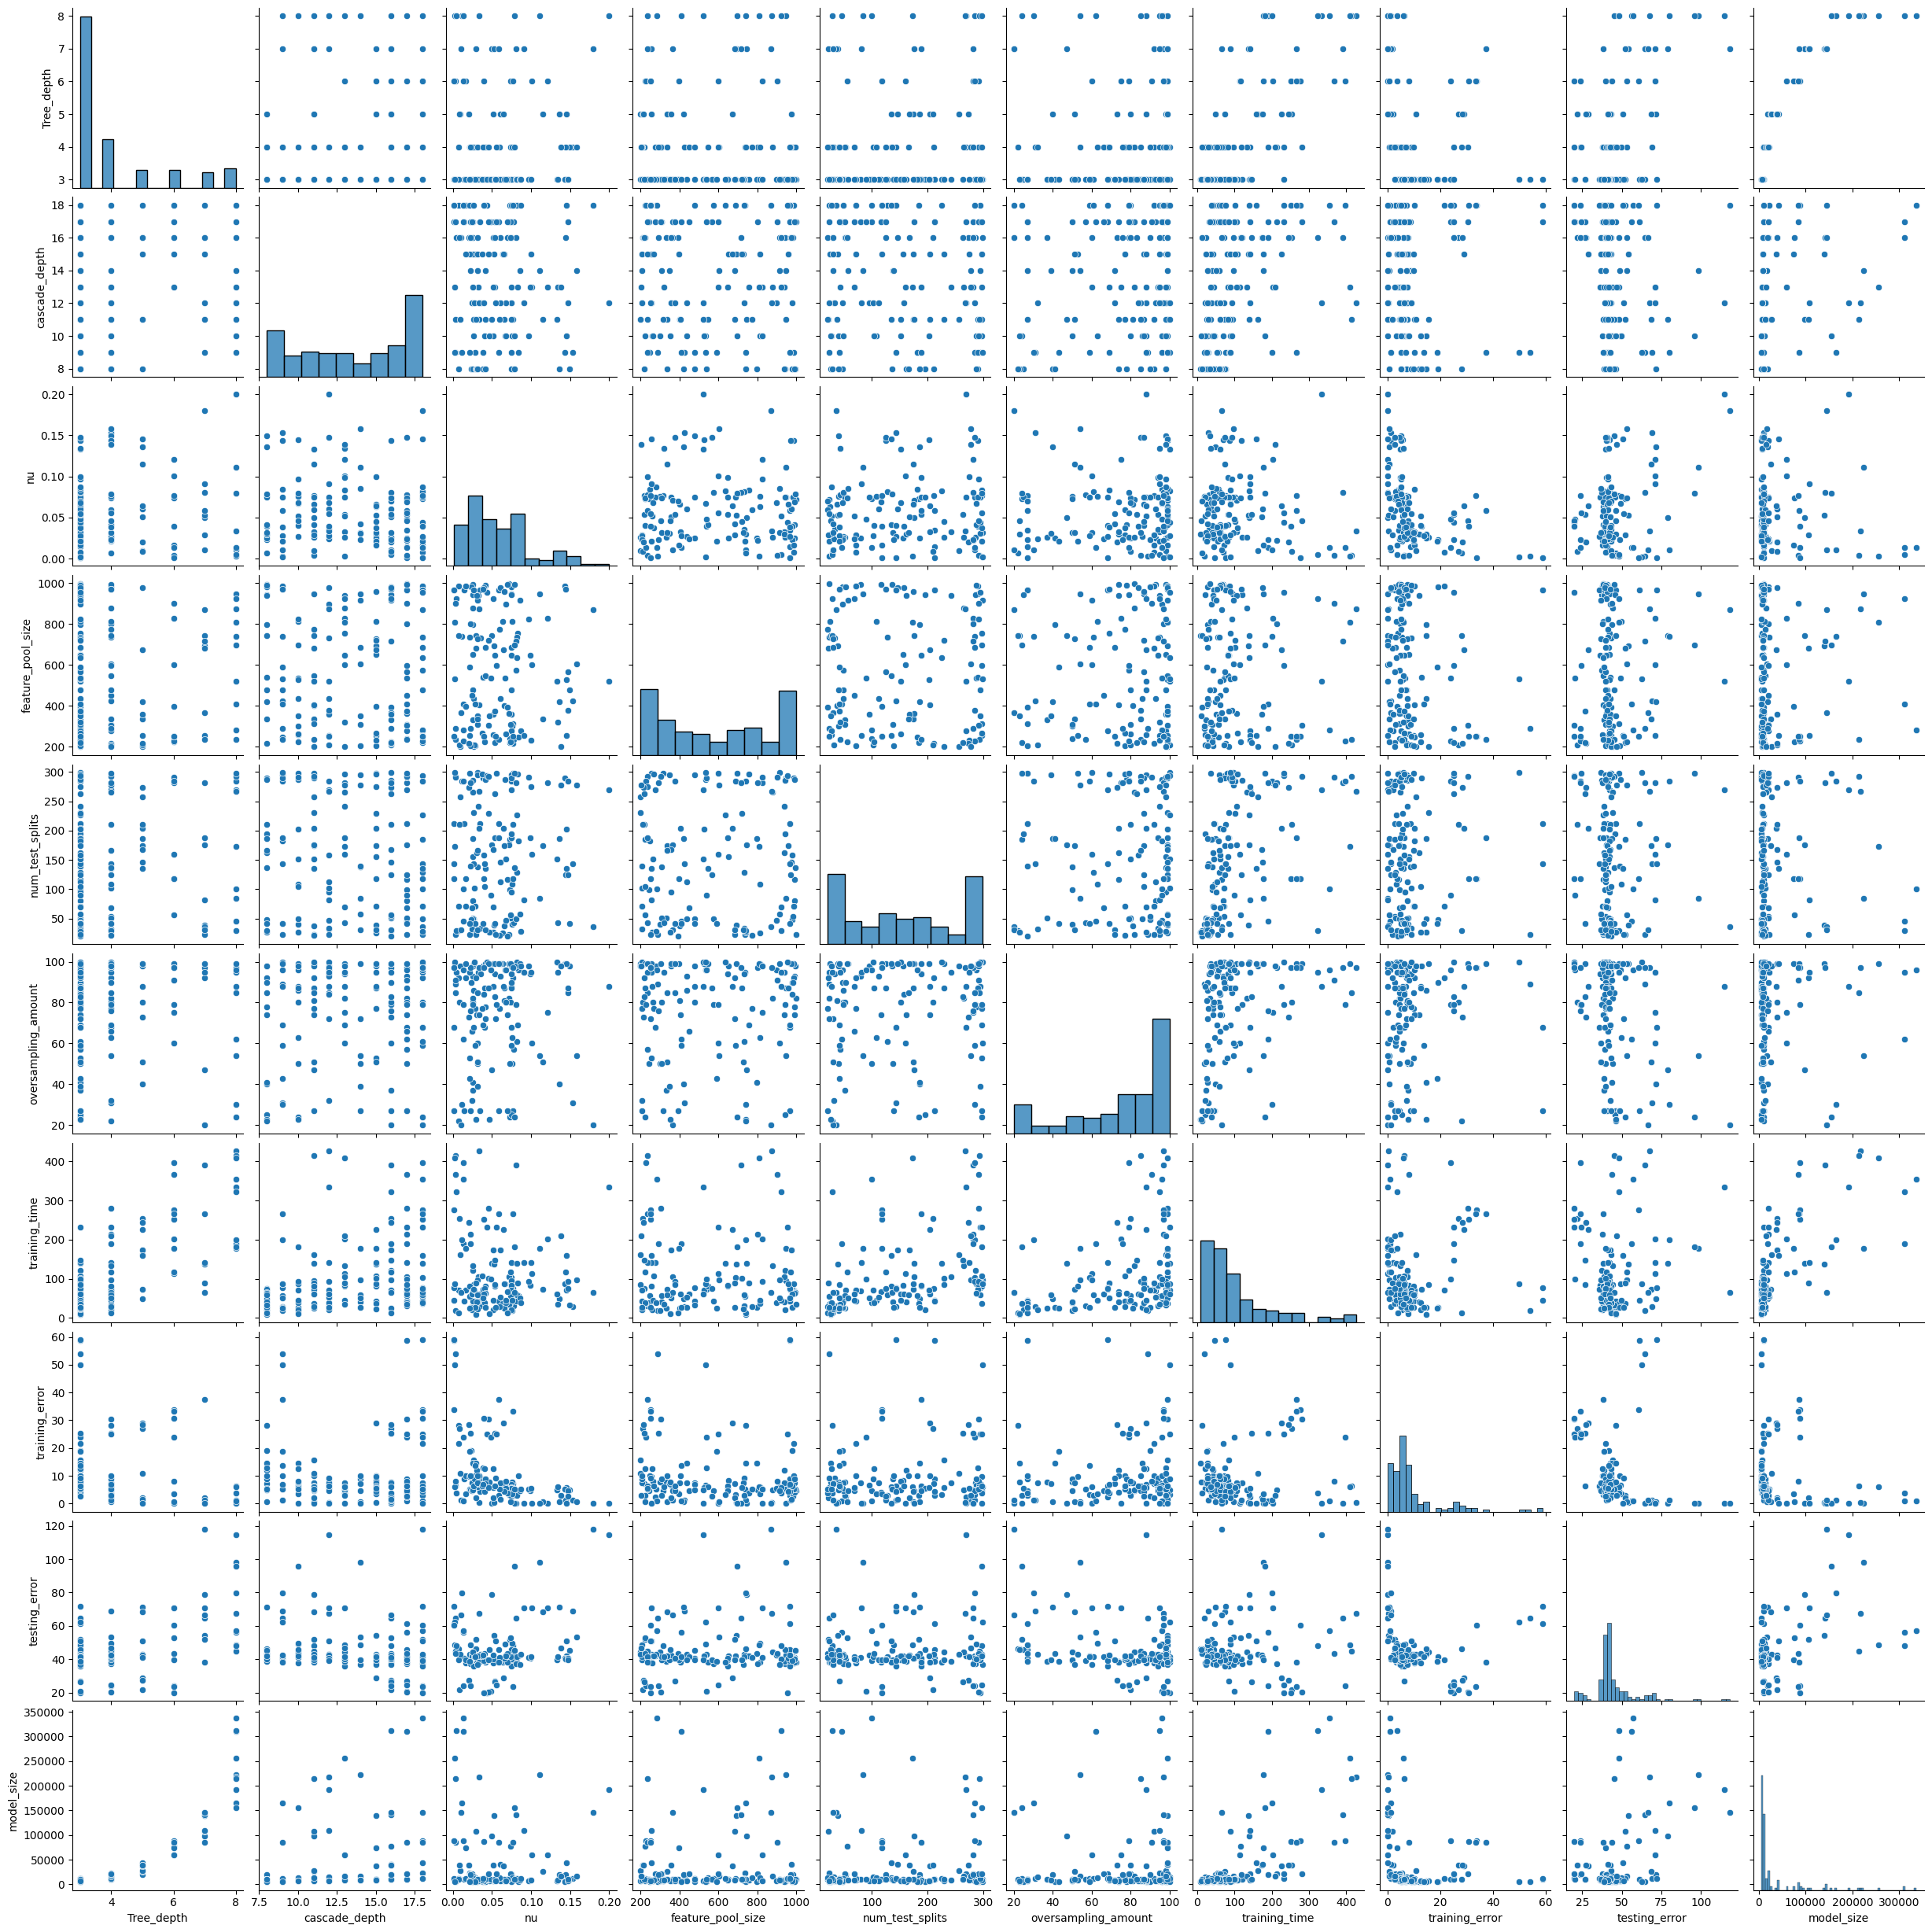

In [57]:

sns.pairplot(small_df)

In [58]:
# Map boxplots to the specific pair of columns in the lower triangle
def custom_boxplot(x, y, ax):
    sns.boxplot(x=x, y=y, ax=ax)


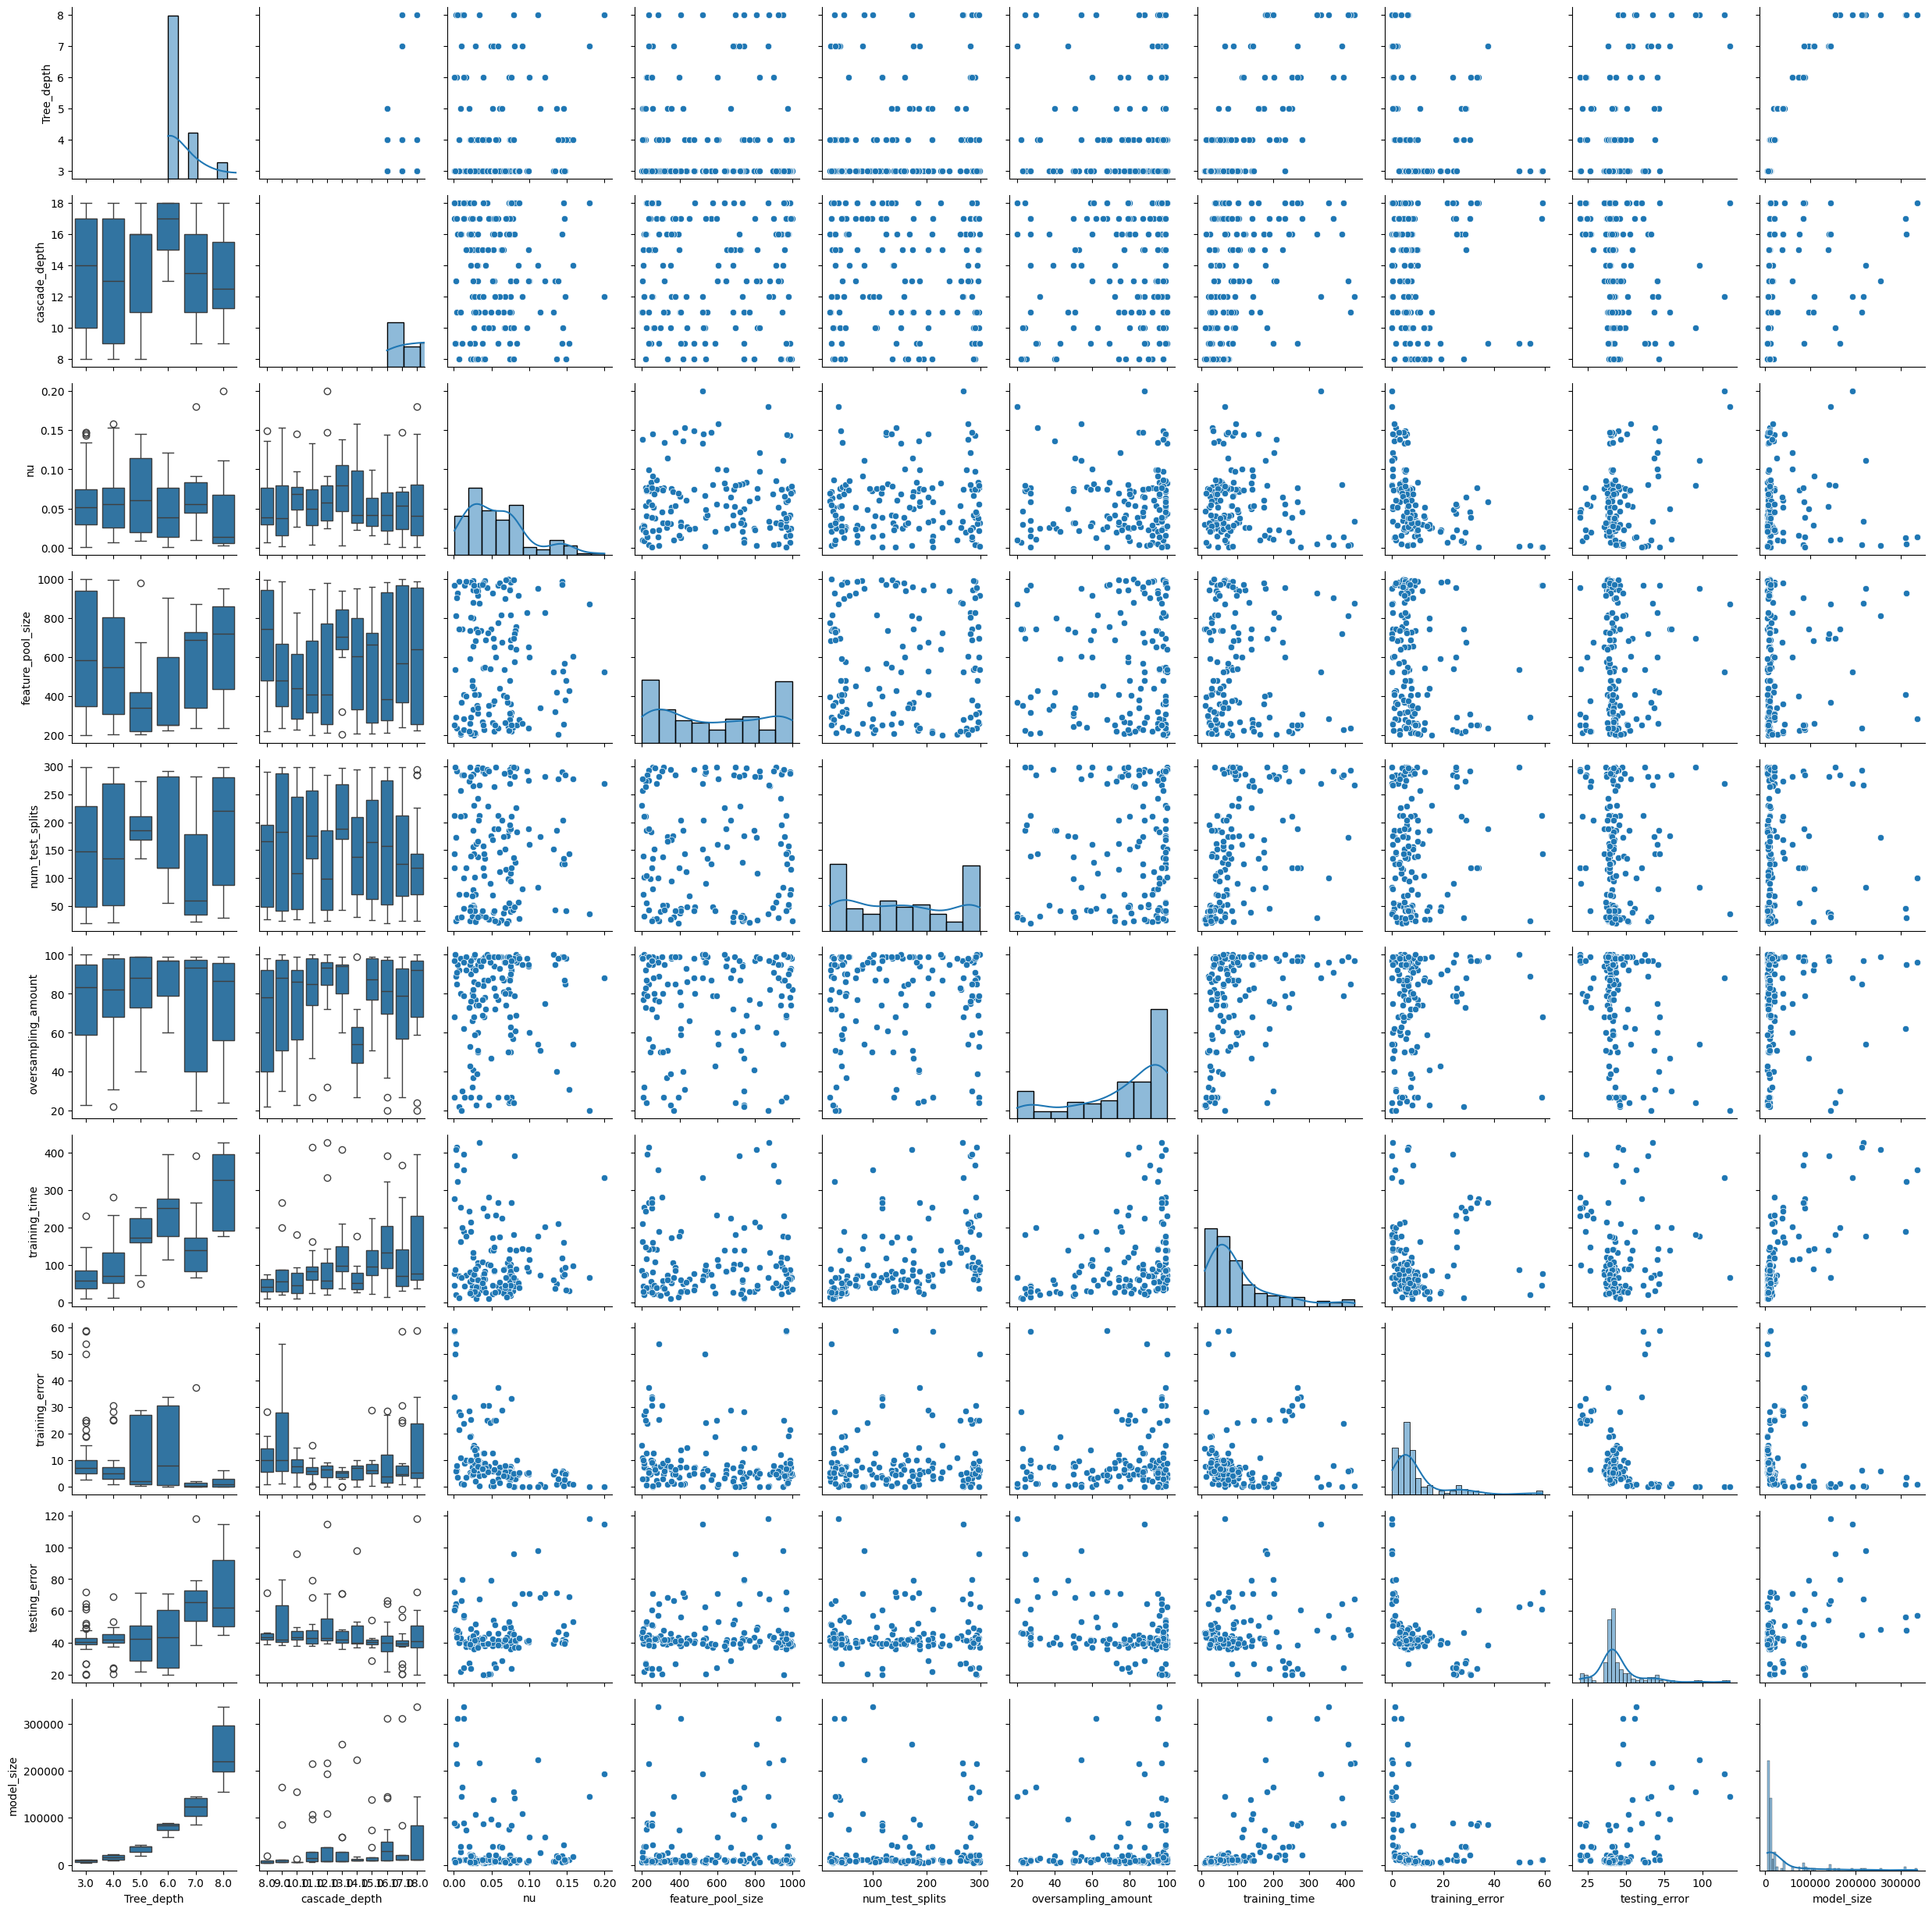

In [59]:

g = sns.PairGrid(small_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)


# Replace scatter plots with boxplots for pairs involving specific columns
for i, j in zip(*np.tril_indices_from(g.axes, -1)):  # Loop over lower triangle
    if g.x_vars[j] in boxplot_cols:
        g.axes[i, j].clear()
        custom_boxplot(x=g.data[g.x_vars[j]], y=g.data[g.y_vars[i]], ax=g.axes[i, j])

# for i, j in zip(*np.tril_indices_from(g.axes, 1)):  # Loop over lower triangle
#     if g.y_vars[j] in boxplot_cols:
#         print(g.y_vars[j])
#         print(g.y_vars[i])
#         # g.axes[i, j].clear()
#         # custom_boxplot(x=g.data[g.x_vars[j]], y=g.data[g.y_vars[i]], ax=g.axes[i, j])


plt.show()


Here the x axis of the histogram does not align with the x axis of the boxplot and I don't understand why

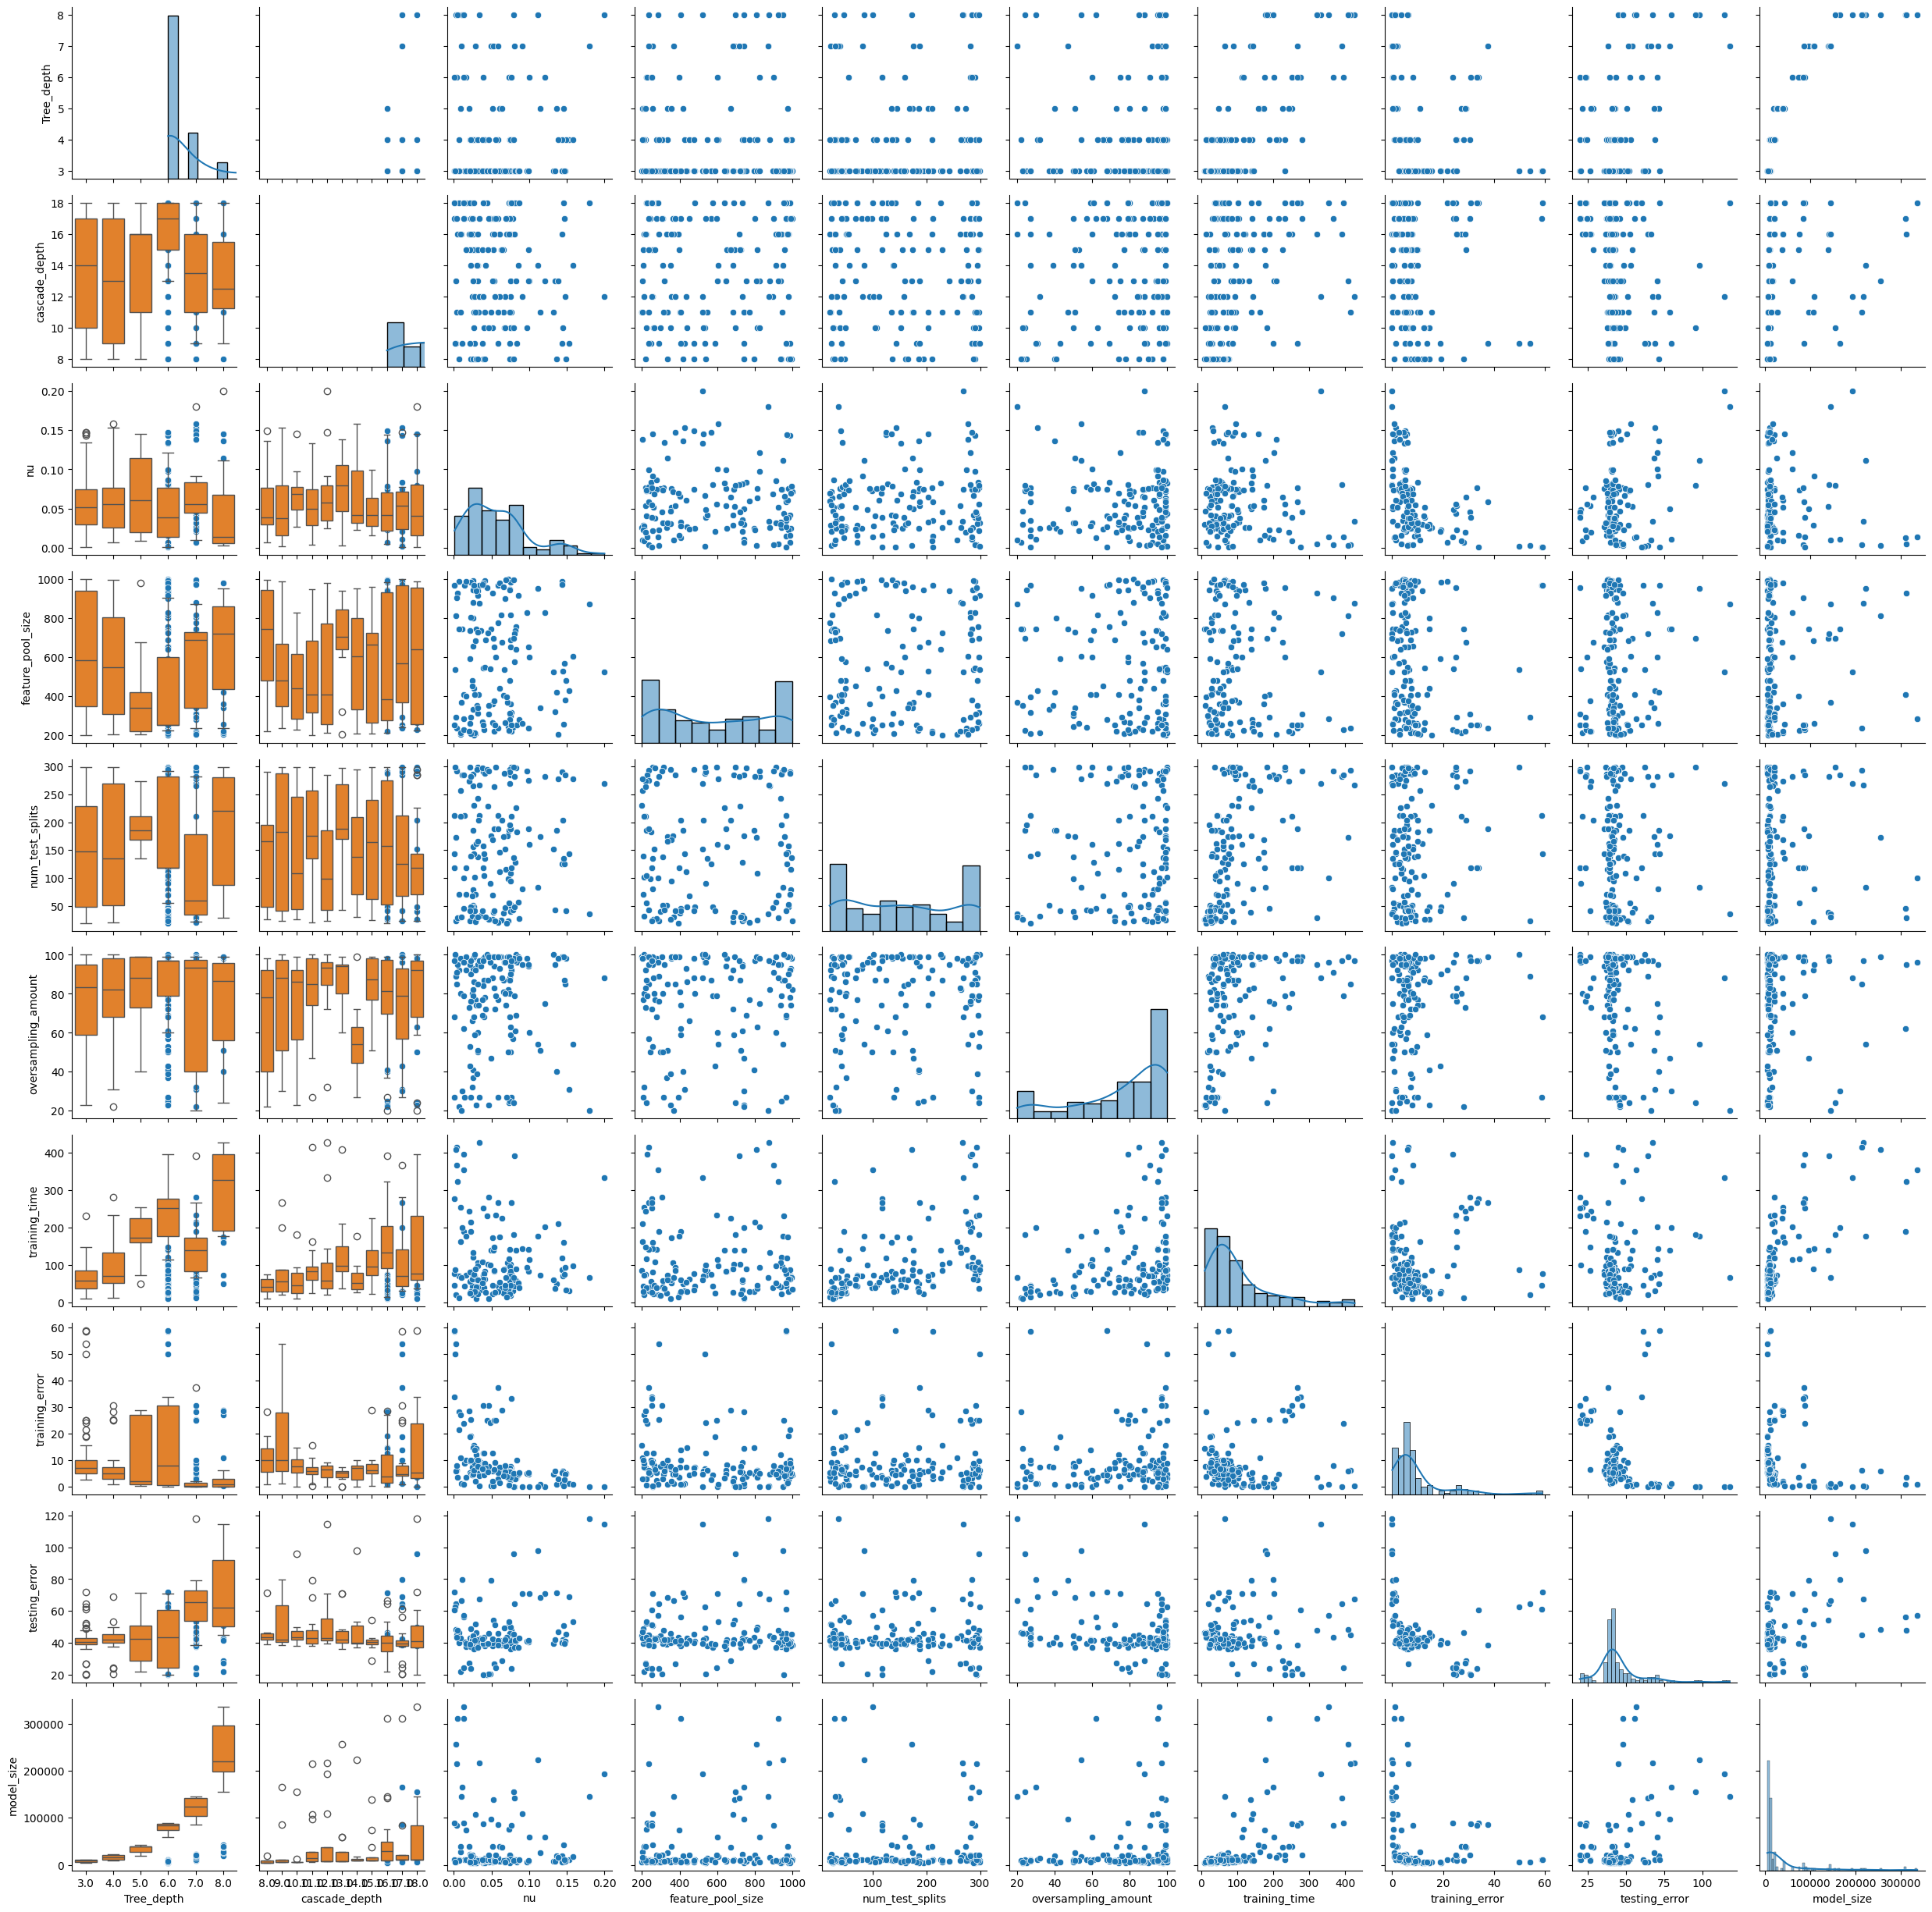

In [60]:
g = sns.PairGrid(small_df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=True)

# Set axis limits before modifying the plots
for i, col in enumerate(g.x_vars):
    x_limits = g.axes[0, i].get_xlim()
    y_limits = g.axes[i, 0].get_ylim()

    # Loop over lower triangle and overlay custom boxplots
    for j in range(i):
        if g.x_vars[j] in boxplot_cols:
            custom_boxplot(x=g.data[g.x_vars[j]], y=g.data[g.y_vars[i]], ax=g.axes[i, j])


plt.show()